Nama: Ayu Wulandari


Email: dari19556@gmail.com

Tugas: Membuat Model Machine Learning dengan Data Time Series

Kriteria Submission yang dibuat:

1.   Dataset yang digunakan memiliki 18530 sampel
2.   Menggunakan LSTM dalam arsitektur model
3. Menggunakan model sequential
4. Validation set sebesar 20% dari total data set
5. Menggunakan Learning Rate pada Optimizer
6. Mengimplementasikan callback



# **Mempersiapkan Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Dataset**


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/DataSet/city_temperature.csv')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


Melihat Type Data dari Dataset

In [4]:
data.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [5]:
data.memory_usage(deep='True')

Index                   128
Region            200858229
Country           179884611
State             141323998
City              189912136
Month              23250616
Day                23250616
Year               23250616
AvgTemperature     23250616
dtype: int64

In [6]:
data.shape

(2906327, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [8]:
data.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


# **Melihat data yang hilang**

In [9]:
data.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [10]:
data['City'].value_counts()

Washington DC    18530
Columbus         18530
Springfield      18530
Washington       18530
Portland         18530
                 ...  
Frankfurt         4136
Flagstaff         3574
Pristina          3427
Yerevan           3226
Bonn              3133
Name: City, Length: 321, dtype: int64

In [11]:
##Saya ingin mengembangkan model waktu untuk satu kota. 
##Untuk tujuan ini, saya mengambil City Columbus

colum = data[data["City"] == "Columbus"]
colum

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1776191,North America,US,Georgia,Columbus,1,1,1995,49.8
1776192,North America,US,Georgia,Columbus,1,2,1995,46.0
1776193,North America,US,Georgia,Columbus,1,3,1995,39.9
1776194,North America,US,Georgia,Columbus,1,4,1995,40.2
1776195,North America,US,Georgia,Columbus,1,5,1995,32.7
...,...,...,...,...,...,...,...,...
2412003,North America,US,Ohio,Columbus,5,9,2020,38.7
2412004,North America,US,Ohio,Columbus,5,10,2020,47.0
2412005,North America,US,Ohio,Columbus,5,11,2020,42.3
2412006,North America,US,Ohio,Columbus,5,12,2020,45.4


In [12]:
colum["Year"].value_counts()

2000    732
2016    732
2012    732
1996    732
2004    732
2008    732
2006    730
2001    730
2017    730
2002    730
2018    730
2003    730
2019    730
2005    730
2015    730
1999    730
2009    730
2010    730
1995    730
2011    730
1997    730
2013    730
1998    730
2014    730
2007    730
2020    268
Name: Year, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [14]:
colum["AvgTemperature"] = np.where(colum["AvgTemperature"] == -99,
                                   np.nan, colum["AvgTemperature"])
colum.isnull().sum()

Region             0
Country            0
State              0
City               0
Month              0
Day                0
Year               0
AvgTemperature    58
dtype: int64

In [15]:
colum["AvgTemperature"] = colum["AvgTemperature"].ffill()
colum.isnull().sum()

Region            0
Country           0
State             0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

In [16]:
colum.dtypes
colum["Time_steps"] = pd.to_datetime((colum.Year*10000 + colum.Month*100 + colum.Day).apply(str),
                                     format='%Y%m%d')
colum

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Time_steps
1776191,North America,US,Georgia,Columbus,1,1,1995,49.8,1995-01-01
1776192,North America,US,Georgia,Columbus,1,2,1995,46.0,1995-01-02
1776193,North America,US,Georgia,Columbus,1,3,1995,39.9,1995-01-03
1776194,North America,US,Georgia,Columbus,1,4,1995,40.2,1995-01-04
1776195,North America,US,Georgia,Columbus,1,5,1995,32.7,1995-01-05
...,...,...,...,...,...,...,...,...,...
2412003,North America,US,Ohio,Columbus,5,9,2020,38.7,2020-05-09
2412004,North America,US,Ohio,Columbus,5,10,2020,47.0,2020-05-10
2412005,North America,US,Ohio,Columbus,5,11,2020,42.3,2020-05-11
2412006,North America,US,Ohio,Columbus,5,12,2020,45.4,2020-05-12


In [17]:
def plot_series(time, series, format="-", start=0, end=None):
    """to plot the series"""
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Year")
    plt.ylabel("Temprature")
    plt.grid(True)

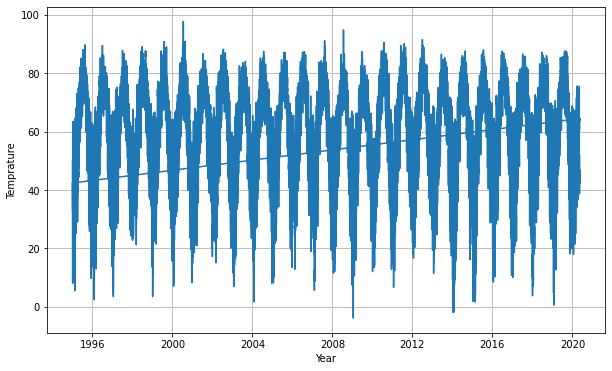

In [18]:
time_step = colum["Time_steps"].tolist()
temprature = colum["AvgTemperature"].tolist()

series = np.array(temprature)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

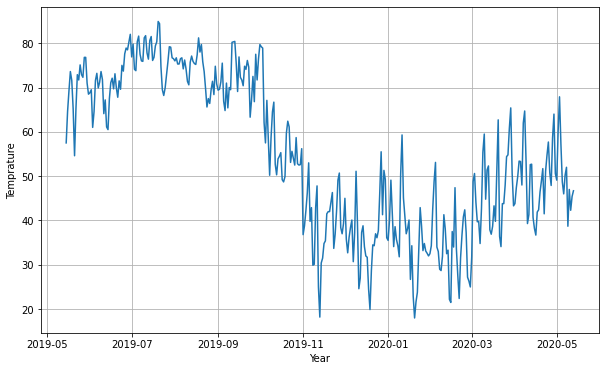

In [19]:
plt.figure(figsize=(10, 6))
plot_series(time[-365:], series[-365:])

In [20]:
##Total dataset untuk kota Columbus ada 18530 dataset
##Saya mengambil 14800 dataset untuk training (80%) dan 20% untuk validasi

split_time = 14800
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [21]:
def windowed_dataset(series, window_size, batch_size, 
                     shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [22]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [23]:
import tensorflow as tf
print(tf.__version__)

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

shuffle_buffer_size = 1000
window_size = 60
batch_size = 128


train_set = windowed_dataset(x_train, window_size, batch_size, 
                             shuffle_buffer_size)
print(train_set)
print(x_train.shape)

2.5.0
<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(14800,)


In [24]:
class my_allback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae') < 0.1):
            print("MAE has reached below 10%")

    def on_train_end(self, epoch, logs={}):
        print('Done')

callbacks = my_allback()

In [25]:
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
loss = tf.keras.losses.Huber()

In [29]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=64, batch_size=100, 
                             shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(128, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

In [44]:
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [46]:
history = model.fit(train_set, epochs=250, callbacks=[callbacks])

Epoch 1/250
148/148 [==============================] - 3s 22ms/step - loss: 8.1260 - mae: 8.6129
Epoch 2/250
148/148 [==============================] - 3s 22ms/step - loss: 8.1162 - mae: 8.6031
Epoch 3/250
148/148 [==============================] - 3s 22ms/step - loss: 8.0969 - mae: 8.5837
Epoch 4/250
148/148 [==============================] - 3s 22ms/step - loss: 8.0908 - mae: 8.5776
Epoch 5/250
148/148 [==============================] - 3s 22ms/step - loss: 8.0753 - mae: 8.5620
Epoch 6/250
148/148 [==============================] - 3s 22ms/step - loss: 8.0617 - mae: 8.5485
Epoch 7/250
148/148 [==============================] - 3s 23ms/step - loss: 8.0353 - mae: 8.5219
Epoch 8/250
148/148 [==============================] - 3s 21ms/step - loss: 8.0304 - mae: 8.5170
Epoch 9/250
148/148 [==============================] - 3s 22ms/step - loss: 8.0143 - mae: 8.5010
Epoch 10/250
148/148 [==============================] - 3s 22ms/step - loss: 8.0112 - mae: 8.4979
Epoch 11/250
148/148 [=======